# Задача
В этой работе вам предлагается решить задачу бинарной классификации, а именно построить алгоритм, определяющий превысит ли средний заработок человека порог $50k. Каждый объект выборки — человек, для которого известны следующие признаки:
 - age
 - workclass
 - fnlwgt
 - education
 - education-num
 - marital-status
 - occupation
 - relationship
 - race
 - sex
 - capital-gain
 - capital-loss
 - hours-per-week
 
Более подробно про признаки можно почитать [здесь](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names). Целевой признак записан в переменной *>50K,<=50K*.

В этой задаче для обучения будут использовать 2 алгоритма:
 - [kNN](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
 - [DecisonTree](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)

# Решение

Загрузите набор данных *data.adult.csv* с помощью `pandas` (скачать можно [здесь](https://drive.google.com/file/d/1Lo47fXx1RrJG3v9E-Gck1T45n5bJ_SJf/view?usp=sharing), или с помощью скрипта ниже). Чтобы лучше понимать, с чем вы работаете/корректно ли вы загрузили данные можно вывести несколько первых строк на экран.

In [ ]:
!gdown 1Lo47fXx1RrJG3v9E-Gck1T45n5bJ_SJf

Downloading...
From: https://drive.google.com/uc?id=1Lo47fXx1RrJG3v9E-Gck1T45n5bJ_SJf
To: /content/data.adult.csv
100% 1.54M/1.54M [00:00<00:00, 34.0MB/s]


In [12]:
# your code here
import pandas as pd

dt = pd.read_csv('data.adult.csv')

dt.head(15)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,">50K,<=50K"
0,34,Local-gov,284843,HS-grad,9,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,<=50K
1,40,Private,190290,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,40,<=50K
2,36,Local-gov,177858,Bachelors,13,Married-civ-spouse,Prof-specialty,Own-child,White,Male,0,0,40,<=50K
3,22,Private,184756,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30,<=50K
4,47,Private,149700,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,15024,0,40,>50K
5,18,Private,446771,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,25,<=50K
6,31,Federal-gov,108464,Assoc-acdm,12,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,<=50K
7,18,?,423460,11th,7,Never-married,?,Own-child,White,Male,0,0,36,<=50K
8,25,Private,110138,HS-grad,9,Never-married,Other-service,Not-in-family,White,Male,0,0,40,<=50K
9,53,Federal-gov,167410,Bachelors,13,Divorced,Tech-support,Not-in-family,Amer-Indian-Eskimo,Male,0,0,40,<=50K


In [13]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16280 entries, 0 to 16279
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16280 non-null  int64 
 1   workclass       16280 non-null  object
 2   fnlwgt          16280 non-null  int64 
 3   education       16280 non-null  object
 4   education-num   16280 non-null  int64 
 5   marital-status  16280 non-null  object
 6   occupation      16280 non-null  object
 7   relationship    16280 non-null  object
 8   race            16280 non-null  object
 9   sex             16280 non-null  object
 10  capital-gain    16280 non-null  int64 
 11  capital-loss    16280 non-null  int64 
 12  hours-per-week  16280 non-null  int64 
 13  >50K,<=50K      16280 non-null  object
dtypes: int64(6), object(8)
memory usage: 1.7+ MB


## Анализ и предобработка данных

Обычно после загрузки датасета всегда необходима его некоторая предобработка. В данном случае она будет заключаться в следующем: 
1. Проверьте есть ли в данных пропущенные значения (здесь они обозначены как "?"). Удалите из выборки все объекты с пропусками.
2. Выделите 60% выборки для обучения и дальнейшего анализа.
3. Обратите внимание, что не все признаки являются вещественными (числовыми). Сначала их необходимо проанализировать и по необходимости предобработать. Все шаги предобработки поясните текстом.
4. Целевую переменную (ту, которую мы хотим предсказывать) можно выделить в отдельную переменную и преобразуйте к бинарному формату (НЕ забудьте удалить ее из датасета, когда будете обучать модель).


In [14]:
# your code here
import numpy as np

dt.replace('?', np.nan, inplace=True)
dt.dropna(inplace=True, ignore_index=True)

In [6]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15347 entries, 0 to 15346
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             15347 non-null  int64 
 1   workclass       15347 non-null  object
 2   fnlwgt          15347 non-null  int64 
 3   education       15347 non-null  object
 4   education-num   15347 non-null  int64 
 5   marital-status  15347 non-null  object
 6   occupation      15347 non-null  object
 7   relationship    15347 non-null  object
 8   race            15347 non-null  object
 9   sex             15347 non-null  object
 10  capital-gain    15347 non-null  int64 
 11  capital-loss    15347 non-null  int64 
 12  hours-per-week  15347 non-null  int64 
 13  >50K,<=50K      15347 non-null  object
dtypes: int64(6), object(8)
memory usage: 1.6+ MB


около 10% процентов сбрили)

In [16]:
dt['>50K,<=50K'] = dt['>50K,<=50K'].map({'>50K': 1, '<=50K': 0})

текстовые значения заменили на числовые, чтоб можно было с ними нормально работать

In [8]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15347 entries, 0 to 15346
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             15347 non-null  int64 
 1   workclass       15347 non-null  object
 2   fnlwgt          15347 non-null  int64 
 3   education       15347 non-null  object
 4   education-num   15347 non-null  int64 
 5   marital-status  15347 non-null  object
 6   occupation      15347 non-null  object
 7   relationship    15347 non-null  object
 8   race            15347 non-null  object
 9   sex             15347 non-null  object
 10  capital-gain    15347 non-null  int64 
 11  capital-loss    15347 non-null  int64 
 12  hours-per-week  15347 non-null  int64 
 13  >50K,<=50K      15347 non-null  int64 
dtypes: int64(7), object(7)
memory usage: 1.6+ MB


## Добавление категориальных признаков

Добавим к предобработанным вещественным признакам категориальные. Но для начала их тоже необходимо предобработать.

Преобразуйте все категориальные признаки с помощью метода one-hot-encoding (например, это можно сделать с помощью функции [pandas.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) или [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) / [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) из sklearn).

После преобразования категориальных признаков, добавьте их к вещественным предобработанным данным для обучения.

>PS Напоминаю, что важно удалить колонку с целевым значением

In [17]:
dt = pd.get_dummies(dt, columns=['workclass', 'education', 'marital-status', 
                                           'occupation', 'relationship', 'race', 'sex'], dtype=int)

In [18]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15347 entries, 0 to 15346
Data columns (total 64 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   age                                   15347 non-null  int64
 1   fnlwgt                                15347 non-null  int64
 2   education-num                         15347 non-null  int64
 3   capital-gain                          15347 non-null  int64
 4   capital-loss                          15347 non-null  int64
 5   hours-per-week                        15347 non-null  int64
 6   >50K,<=50K                            15347 non-null  int64
 7   workclass_Federal-gov                 15347 non-null  int32
 8   workclass_Local-gov                   15347 non-null  int32
 9   workclass_Private                     15347 non-null  int32
 10  workclass_Self-emp-inc                15347 non-null  int32
 11  workclass_Self-emp-not-inc            153

One-Hot Encoding сделал бинарные столбцы для всех значений из категориальных столбцов


In [21]:
target = dt['>50K,<=50K']

In [22]:
print('<= 50K:', target.loc[target == 0].count())
print('> 50K:', target.loc[target == 1].count())
print('Rich-poor ratio:', round(target.loc[target == 0].count() / target.loc[target == 1].count(), 2))

<= 50K: 11407
> 50K: 3940
Rich-poor ratio: 2.9


In [25]:
for col in dt.columns:
    print(col, ':', dt[col].sum())

age : 590791
fnlwgt : 2902954632
education-num : 155785
capital-gain : 16164905
capital-loss : 1360780
hours-per-week : 627576
>50K,<=50K : 3940
workclass_Federal-gov : 461
workclass_Local-gov : 1067
workclass_Private : 11282
workclass_Self-emp-inc : 561
workclass_Self-emp-not-inc : 1324
workclass_State-gov : 645
workclass_Without-pay : 7
education_10th : 407
education_11th : 524
education_12th : 186
education_1st-4th : 68
education_5th-6th : 142
education_7th-8th : 289
education_9th : 233
education_Assoc-acdm : 509
education_Assoc-voc : 695
education_Bachelors : 2585
education_Doctorate : 192
education_HS-grad : 4953
education_Masters : 858
education_Preschool : 25
education_Prof-school : 290
education_Some-college : 3391
marital-status_Divorced : 2080
marital-status_Married-AF-spouse : 10
marital-status_Married-civ-spouse : 7240
marital-status_Married-spouse-absent : 190
marital-status_Never-married : 4910
marital-status_Separated : 495
marital-status_Widowed : 422
occupation_Adm-cle

При обучении алгоритмов стоит обращать внимание не только на их качество, но и каким образом они работают с данными. Давайте посмотрим на значения самих признаков.

Что можете сказать о разбросе данных и сбалансированности выборки? Какой из алгоритмов, на ваш взгляд окажется более качественным: логический или метрический? Почему?

1. тех, кто зарабатывает менее 50к в 2.9 раза больше
2. данные несблансированые
3. дерерво решений, будет лучше из-за большого количества признаков и несбалансировности

In [27]:
# your code here
dt.drop(columns=['>50K,<=50K'], inplace=True)

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(dt, train_size=0.6, random_state=42)

In [62]:
# your code here
y_train = target.loc[X_train.index]
y_test = target.loc[X_test.index]

## Обучение классификаторов

В начале посмотрим, как работает подбор параметров по сетке и как влияет на качество разбиение выборки. Сейчас и далее будем рассматривать 2 алгоритма:
 - [kNN](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
 - [DecisonTree](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)

Для начала выберем один гиперпараметр, который будем оптимизировать:
 - kNN — число соседей (*n_neighbors*)
 - DecisonTree — глубина дерева (*max_depth*)
 
Остальные параметры оставляйте в значениях по умолчанию.

Для каждого алгоритма подберите оптимальные значения указанных гиперпараметров. Постройте график среднего значения качества по кросс-валидации алгоритма при заданном значении гиперпараметра, на котором также отобразите доверительный интервал.

Что вы можете сказать о получившихся графиках? Какой алгоритм справился лучше? Какой быстрее? Почему?

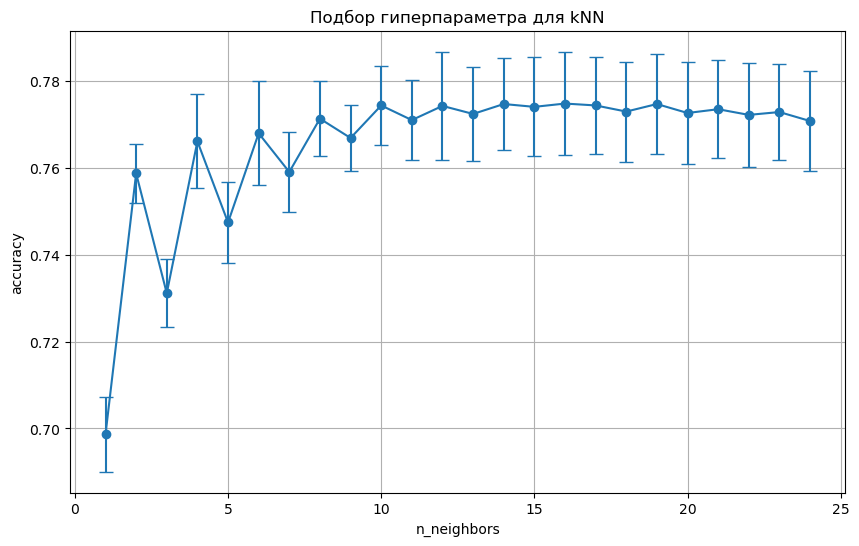

In [37]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
param_range_knn = range(1, 25)

mean_scores_knn = []
std_scores_knn = []

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for k in param_range_knn:
    knn.set_params(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=kf, scoring='accuracy')
    mean_scores_knn.append(np.mean(scores))
    std_scores_knn.append(np.std(scores))

plt.figure(figsize=(10, 6))
plt.errorbar(param_range_knn, mean_scores_knn, yerr=std_scores_knn, fmt='-o', capsize=5)
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.title('Подбор гиперпараметра для kNN')
plt.grid(True)
plt.show()

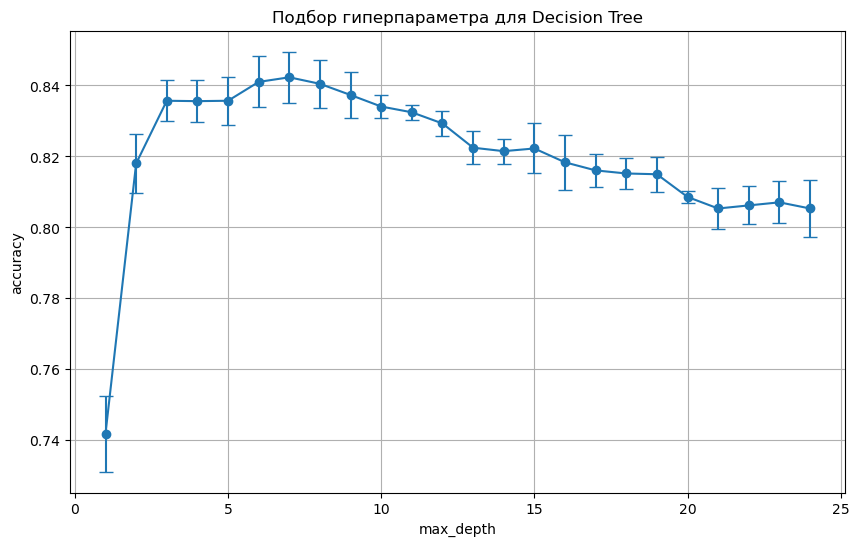

In [36]:
dic_tree = DecisionTreeClassifier(random_state=42)
param_range_dt = range(1, 25)

mean_scores_dt = []
std_scores_dt = []

for depth in param_range_dt:
    dic_tree.set_params(max_depth=depth)
    scores = cross_val_score(dic_tree, X_train, y_train, cv=kf, scoring='accuracy')
    mean_scores_dt.append(np.mean(scores))
    std_scores_dt.append(np.std(scores))

plt.figure(figsize=(10, 6))
plt.errorbar(param_range_dt, mean_scores_dt, yerr=std_scores_dt, fmt='-o', capsize=5)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title('Подбор гиперпараметра для Decision Tree')
plt.grid(True)
plt.show()


Дерево быстре на этапе предсказания. Оптимальный параметр для дерево = 6. Для кНН = 10.

## PCA преобразование

Теперь попробуем сделать преобразрование данных с помощью PCA. Выберите оптимальное количество компонент и преобразуйте данные. Объясните свой выбор.

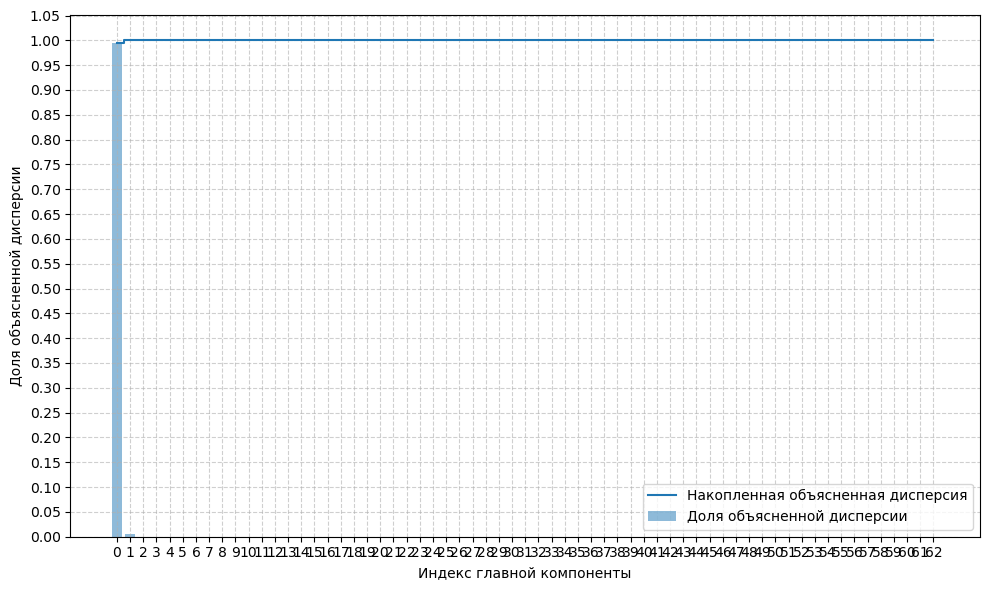

Оптимальное количество компонент: 1


In [41]:
# your code here
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train)

exp_var_pca = pca.explained_variance_ratio_

cum_sum_eigenvalues = np.cumsum(exp_var_pca)


plt.figure(figsize=(10, 6))
plt.bar(range(0, len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Доля объясненной дисперсии')
plt.step(range(0, len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid', label='Накопленная объясненная дисперсия')

plt.xticks(np.arange(0, len(exp_var_pca), step=1)) 
plt.yticks(np.arange(0, 1.1, step=0.05))
plt.grid(True, linestyle='--', alpha=0.6)

plt.ylabel('Доля объясненной дисперсии')
plt.xlabel('Индекс главной компоненты')

plt.legend(loc='best')

plt.tight_layout()
plt.show()

optimal_components = np.argmax(cum_sum_eigenvalues >= 0.95) + 1
print(f'Оптимальное количество компонент: {optimal_components}')


## Обучение классификаторов на данных, трансформированных с помощью PCA

Обучим те же классификаторы на трансформированных с помощью PCA данных. Подберите оптимальные значения исследуемых гиперпараметров для новых данных. Постройте график среднего значения качества по кросс-валидации алгоритма при заданном значении гиперпараметра, на котором также отобразите доверительный интервал.

Что вы можете сказать о получившихся графиках? Какой алгоритм справился лучше? Какой быстрее? Почему?

In [42]:
# your code here
pca = PCA(n_components=1)  
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [44]:
knn = KNeighborsClassifier(n_neighbors=10)  
kf = KFold(n_splits=5, shuffle=True, random_state=42)
knn_scores = cross_val_score(knn, X_train_pca, y_train, cv=kf, scoring='accuracy')

mean_knn_score = np.mean(knn_scores)
std_knn_score = np.std(knn_scores)

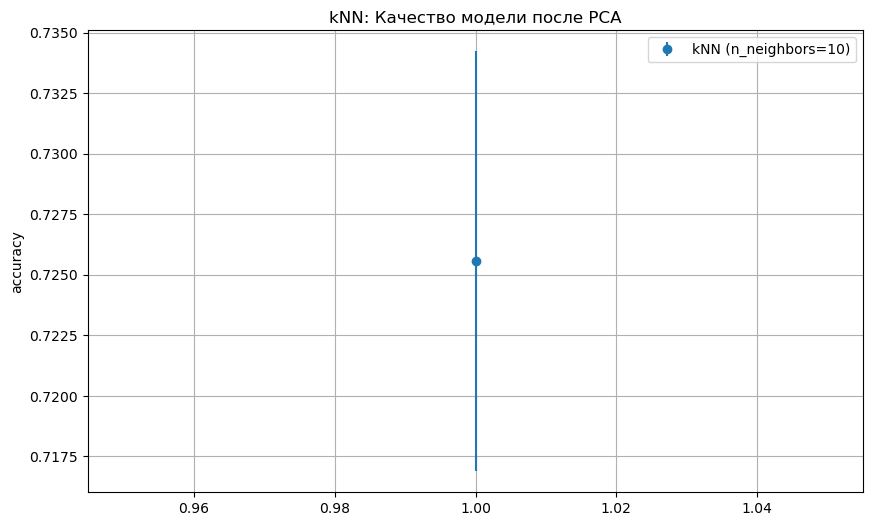

In [54]:
plt.figure(figsize=(10, 6))
plt.errorbar([1], [mean_knn_score], yerr=[std_knn_score], fmt='o', label=f'kNN (n_neighbors=10)')
plt.ylabel('accuracy')
plt.title('kNN: Качество модели после PCA')
plt.grid(True)
plt.legend()
plt.show()

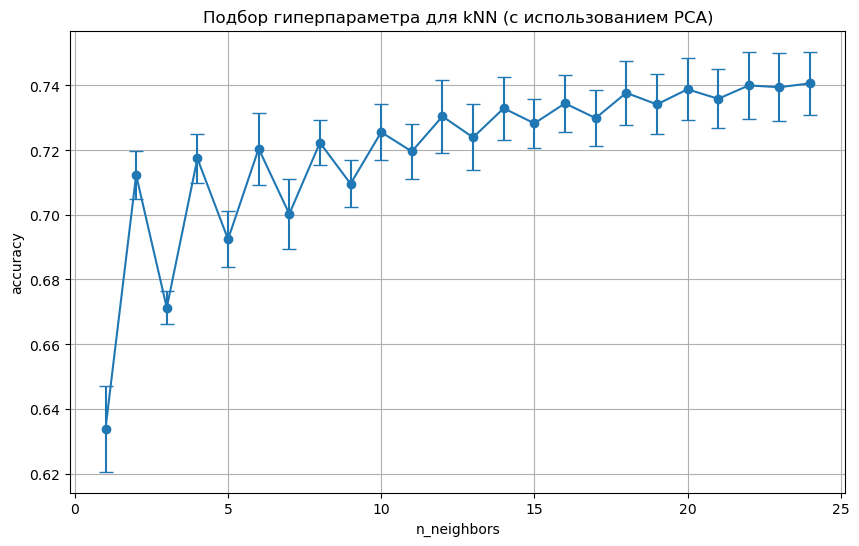

In [56]:
knn = KNeighborsClassifier()
param_range_knn = range(1, 25)

mean_scores_knn = []
std_scores_knn = []

for k in param_range_knn:
    knn.set_params(n_neighbors=k)
    scores = cross_val_score(knn, X_train_pca, y_train, cv=kf, scoring='accuracy')
    mean_scores_knn.append(np.mean(scores))
    std_scores_knn.append(np.std(scores))


plt.figure(figsize=(10, 6))
plt.errorbar(param_range_knn, mean_scores_knn, yerr=std_scores_knn, fmt='-o', capsize=5)
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.title('Подбор гиперпараметра для kNN (с использованием PCA)')
plt.grid(True)
plt.show()

In [47]:
dic_tree = DecisionTreeClassifier(max_depth=6, random_state=42)  
dic_tree_scores = cross_val_score(dic_tree, X_train_pca, y_train, cv=kf, scoring='accuracy')

mean_dic_tree_score = np.mean(dic_tree_scores)
std_dic_tree_score = np.std(dic_tree_scores)

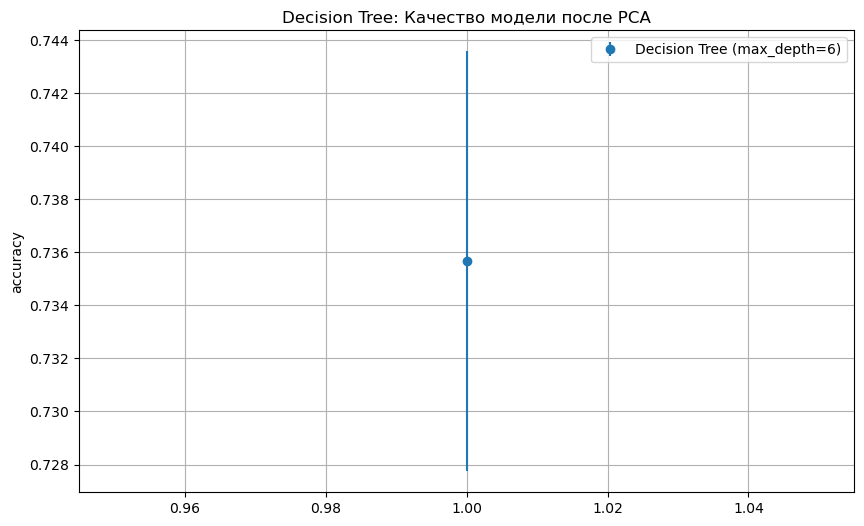

In [55]:
plt.figure(figsize=(10, 6))
plt.errorbar([1], [mean_dic_tree_score], yerr=[std_dic_tree_score], fmt='o', label=f'Decision Tree (max_depth=6)')
plt.ylabel('accuracy')
plt.title('Decision Tree: Качество модели после PCA')
plt.grid(True)
plt.legend()
plt.show()

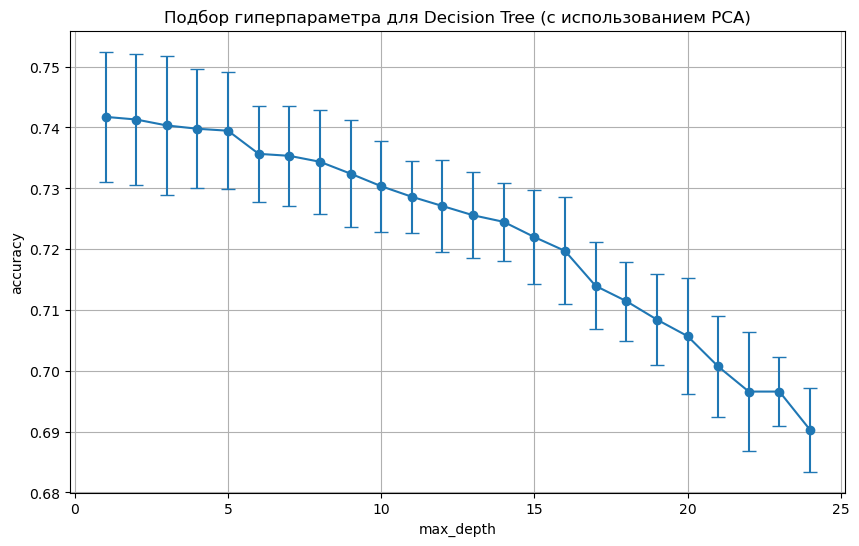

In [57]:
dic_tree = DecisionTreeClassifier(random_state=42)
param_range_dt = range(1, 25)

mean_scores_dt = []
std_scores_dt = []

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for depth in param_range_dt:
    dic_tree.set_params(max_depth=depth)
    scores = cross_val_score(dic_tree, X_train_pca, y_train, cv=kf, scoring='accuracy')
    mean_scores_dt.append(np.mean(scores))
    std_scores_dt.append(np.std(scores))

plt.figure(figsize=(10, 6))
plt.errorbar(param_range_dt, mean_scores_dt, yerr=std_scores_dt, fmt='-o', capsize=5)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title('Подбор гиперпараметра для Decision Tree (с использованием PCA)')
plt.grid(True)
plt.show()

## Сравнение результатов

Сравните результаты полученные до трансформации данных с помощью PCA и после. Есть ли изменения динамики среднего значения качества по кросс-валидации алгоритма? Объясните почему?

РСА снизил размерность данных, модель стала проще. Динамика среднего значения качесва по кросс-валидации измнеилась, оптимальные параметры достигаются быстрее, значит модель будет быстрее обучаться

## Тестирование всех модели

Протестируйте все построенные модели (в т.ч. с и без PCA трансформации) на данных, которые были отложены для теста (их должно было остаться 40%). Не забудьте про все необходимые преобразования.

In [66]:
from sklearn.metrics import accuracy_score

knn_optimal = KNeighborsClassifier(n_neighbors=10)  
dt_optimal = DecisionTreeClassifier(max_depth=6)  

knn_optimal.fit(X_train, y_train)  
dt_optimal.fit(X_train, y_train) 

knn_optimal_pca = KNeighborsClassifier(n_neighbors=10)  
dt_optimal_pca = DecisionTreeClassifier(max_depth=1)  

knn_optimal_pca.fit(X_train_pca, y_train) 
dt_optimal_pca.fit(X_train_pca, y_train)  

knn_accuracy = accuracy_score(y_test, knn_optimal.predict(X_test)) 
dt_accuracy = accuracy_score(y_test, dt_optimal.predict(X_test))  

knn_accuracy_pca = accuracy_score(y_test, knn_optimal_pca.predict(X_test_pca)) 
dt_accuracy_pca = accuracy_score(y_test, dt_optimal_pca.predict(X_test_pca))  

print(f"kNN Accuracy: {knn_accuracy:.4f}")
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")
print(f"PCA kNN Accuracy : {knn_accuracy_pca:.4f}")
print(f"PCA Decision Tree Accuracy: {dt_accuracy_pca:.4f}")


kNN Accuracy: 0.7824
Decision Tree Accuracy: 0.8467
PCA kNN Accuracy : 0.7301
PCA Decision Tree Accuracy: 0.7456


1. Дерево решений оказалось эффективней в обоих случаях
2. РСА ухудшила результат в обоих случаях

Итого: обработал входные данные, убрав пустые значения и адаптировав категорилианые признаки. Также провел оптимизацию гиперпараметров, использовал РСА, протестировал полученные модели